In [128]:
89

89

In [129]:
from typing import Annotated

from langchain_core.messages import AnyMessage, AIMessage

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import interrupt, Command
from dotenv import load_dotenv
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage

import os 
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()


True

In [130]:
load_dotenv()

model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [131]:
class substate(TypedDict):
    input_text: str
    translated_text: str


In [132]:
def translated_text(state: substate):
    promt = f""" translate the following text in hindi
    keep it simple and clear  just give the main content 
    test:
    {state['input_text']}

      """


    translated_text = model.invoke(promt).content
    return {"translated_text": translated_text}

In [133]:
sub_graph_builder = StateGraph(substate)

sub_graph_builder.add_node('translated_text',translated_text)


sub_graph_builder.add_edge(START, 'translated_text')
sub_graph_builder.add_edge('translated_text',END)
subgraph = sub_graph_builder.compile()

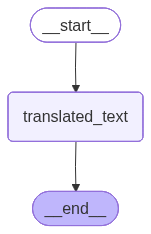

In [134]:
subgraph

In [135]:
class ParentState(TypedDict):
    question: str
    answer_eng: str  
    answer_hindi: str

In [136]:
def GenearteAnswer(state:ParentState):
    promt = f""" ans the following Question i simmple and give just the ans no extra thingd 
    question :
    {state["question"]}
    
     """
    answer_eng = model.invoke(promt).content

    return {"answer_eng":answer_eng}
    

In [137]:
def trnslate_ans(state:ParentState):


    answer_hindi = subgraph.invoke({'input_text': state['answer_eng']})

    return {"answer_hindi":answer_hindi}

In [138]:
builder = StateGraph(ParentState)

builder.add_node("answer",GenearteAnswer )
builder.add_node("translate", trnslate_ans)

In [139]:
builder.add_edge(START, "answer")
builder.add_edge("answer", "translate")
builder.add_edge("translate", END)


In [140]:
graph = builder.compile()

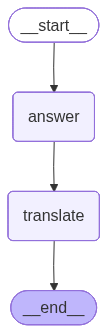

In [141]:
graph

In [145]:
graph.invoke({"question": "write a eassay on india"})

{'question': 'write a eassay on india',
 'answer_eng': 'India, a land of astounding diversity, stands as a vibrant mosaic of cultures, languages, and traditions. Located in South Asia, it is the world\'s most populous democracy and a cradle of ancient civilizations. Its unique identity is forged from centuries of history and a spirit of unity amidst vast differences.\n\nFrom the snow-capped Himalayas in the north to the sun-kissed beaches of the south, India\'s geography is as varied as its people. This diversity is reflected in its countless festivals, like Diwali and Eid, celebrated with equal fervor, and in its over twenty official languages. Ancient heritage sites, like the Taj Mahal and temples of Khajuraho, narrate tales of rich artistic and architectural prowess, while classical music and dance forms continue to thrive, preserving its deep cultural roots.\n\nAs a democratic republic, India prides itself on its secular values and the constitutional rights granted to all its citiz